### ASSIGNMENT_16_NEURAL_NETWORKS_FOREST_FIRES

### IMPORT NECESSARY LIBRARIES

In [54]:
import pandas as pd
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Activation,Layer,Lambda

### IMPORT DATA

In [2]:
forestfires = pd.read_csv("forestfires.csv")
forestfires


,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


### DATA UNDERSTANDING

In [ ]:
#As dummy variables are already created, we will remove the month and alsoday columns
forestfires.drop(["month","day"],axis=1,inplace = True)

In [8]:
forestfires["size_category"].value_counts()



small    378
large    139
Name: size_category, dtype: int64

In [9]:
forestfires.isnull().sum()


FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

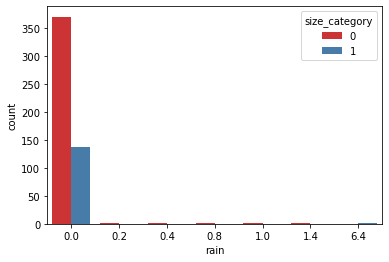

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x = 'rain', hue = 'size_category', data = forestfires, palette='Set1')
plt.show()

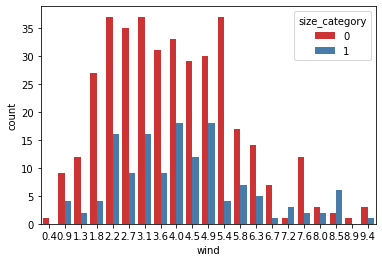

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x = 'wind', hue = 'size_category', data = forestfires, palette='Set1')
plt.show()

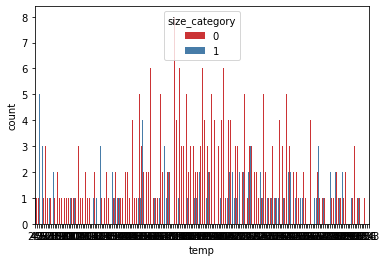

In [57]:
sns.countplot(x = 'temp', hue = 'size_category', data = forestfires, palette='Set1')
plt.show()

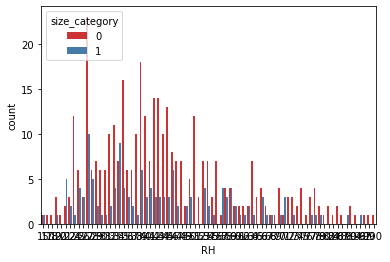

In [58]:
sns.countplot(x = 'RH', hue = 'size_category', data = forestfires, palette='Set1')
plt.show()

In [6]:
forestfires.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### DATA PROCESSING

In [61]:
##I am taking small as 0 and large as 1
forestfires.loc[forestfires["size_category"]=='small','size_category']=0
forestfires.loc[forestfires["size_category"]=='large','size_category']=1
forestfires["size_category"].value_counts()

0    378
1    139
Name: size_category, dtype: int64

In [12]:
#Normalization being done.
def norm_func(i):
     x = (i-i.min())/(i.max()-i.min())
     return (x)

In [13]:
predictors = forestfires.iloc[:,0:28]
target = forestfires.iloc[:,28]

In [15]:
predictors1 = norm_func(predictors)
predictors1

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,0.870968,0.086492,0.101325,0.090909,0.192926,0.423529,0.700000,0.00000,0.000000,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.927742,0.118194,0.775419,0.119430,0.508039,0.211765,0.055556,0.00000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.927742,0.146795,0.796294,0.119430,0.398714,0.211765,0.100000,0.00000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.941935,0.110958,0.081623,0.160428,0.196141,0.964706,0.400000,0.03125,0.000000,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.910968,0.172984,0.110590,0.171123,0.295820,0.988235,0.155556,0.00000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,0.811613,0.191592,0.771315,0.033868,0.823151,0.200000,0.255556,0.00000,0.005904,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
513,0.811613,0.191592,0.771315,0.033868,0.633441,0.658824,0.600000,0.00000,0.049769,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
514,0.811613,0.191592,0.771315,0.033868,0.610932,0.647059,0.700000,0.00000,0.010231,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
515,0.976774,0.499311,0.711622,0.201426,0.752412,0.317647,0.400000,0.00000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


###  MODEL BUILDING

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(predictors1,target, test_size=0.3,stratify = target)

In [17]:

def prep_model(hidden_dim):
    model = Sequential()
    for i in range(1,len(hidden_dim)-1):
        if (i==1):
            model.add(Dense(hidden_dim[i],input_dim=hidden_dim[0],activation="relu"))
        else:
            model.add(Dense(hidden_dim[i],activation="relu"))
    model.add(Dense(hidden_dim[-1],kernel_initializer="normal",activation="sigmoid"))
    model.compile(loss="binary_crossentropy",optimizer = "rmsprop",metrics = ["accuracy"])
    return model  

In [19]:
first_model = prep_model([28,50,40,20,1])
first_model.fit(np.asarray(x_train).astype('float32'),np.asarray(y_train).astype("float32"),epochs=500)
pred_train = first_model.predict(np.array(x_train))


Epoch 1/500
12/12 [==============================] - 4s 3ms/step - loss: 0.6822 - accuracy: 0.6925
Epoch 2/500
12/12 [==============================] - 0s 3ms/step - loss: 0.6473 - accuracy: 0.7313
Epoch 3/500
12/12 [==============================] - 0s 3ms/step - loss: 0.6038 - accuracy: 0.7313
Epoch 4/500
12/12 [==============================] - 0s 3ms/step - loss: 0.5843 - accuracy: 0.7313
Epoch 5/500
12/12 [==============================] - 0s 3ms/step - loss: 0.5833 - accuracy: 0.7313
Epoch 6/500
12/12 [==============================] - 0s 2ms/step - loss: 0.5804 - accuracy: 0.7313
Epoch 7/500
12/12 [==============================] - 0s 3ms/step - loss: 0.5781 - accuracy: 0.7313
Epoch 8/500
12/12 [==============================] - 0s 3ms/step - loss: 0.5762 - accuracy: 0.7313
Epoch 9/500
12/12 [==============================] - 0s 3ms/step - loss: 0.5759 - accuracy: 0.7313
Epoch 10/500
12/12 [==============================] - 0s 3ms/step - loss: 0.5746 - accuracy: 0.7313
Epoch 11/

12/12 [==============================] - 0s 2ms/step - loss: 0.3360 - accuracy: 0.8670
Epoch 84/500
12/12 [==============================] - 0s 2ms/step - loss: 0.3383 - accuracy: 0.8643
Epoch 85/500
12/12 [==============================] - 0s 2ms/step - loss: 0.3190 - accuracy: 0.8809
Epoch 86/500
12/12 [==============================] - 0s 2ms/step - loss: 0.3450 - accuracy: 0.8643
Epoch 87/500
12/12 [==============================] - 0s 2ms/step - loss: 0.3150 - accuracy: 0.8753
Epoch 88/500
12/12 [==============================] - 0s 2ms/step - loss: 0.3177 - accuracy: 0.8698
Epoch 89/500
12/12 [==============================] - 0s 3ms/step - loss: 0.3159 - accuracy: 0.8670
Epoch 90/500
12/12 [==============================] - 0s 2ms/step - loss: 0.3123 - accuracy: 0.8698
Epoch 91/500
12/12 [==============================] - 0s 2ms/step - loss: 0.2961 - accuracy: 0.8920
Epoch 92/500
12/12 [==============================] - 0s 2ms/step - loss: 0.3064 - accuracy: 0.8864
Epoch 93/500


12/12 [==============================] - 0s 2ms/step - loss: 0.1070 - accuracy: 0.9612
Epoch 165/500
12/12 [==============================] - 0s 2ms/step - loss: 0.1287 - accuracy: 0.9584
Epoch 166/500
12/12 [==============================] - 0s 2ms/step - loss: 0.0950 - accuracy: 0.9695
Epoch 167/500
12/12 [==============================] - 0s 2ms/step - loss: 0.1067 - accuracy: 0.9612
Epoch 168/500
12/12 [==============================] - 0s 2ms/step - loss: 0.1335 - accuracy: 0.9446
Epoch 169/500
12/12 [==============================] - 0s 3ms/step - loss: 0.1404 - accuracy: 0.9418
Epoch 170/500
12/12 [==============================] - 0s 2ms/step - loss: 0.0871 - accuracy: 0.9723
Epoch 171/500
12/12 [==============================] - 0s 2ms/step - loss: 0.1128 - accuracy: 0.9557
Epoch 172/500
12/12 [==============================] - 0s 2ms/step - loss: 0.1270 - accuracy: 0.9529
Epoch 173/500
12/12 [==============================] - 0s 2ms/step - loss: 0.1020 - accuracy: 0.9584
Epoc

12/12 [==============================] - 0s 2ms/step - loss: 0.0592 - accuracy: 0.9778
Epoch 246/500
12/12 [==============================] - 0s 2ms/step - loss: 0.0876 - accuracy: 0.9584
Epoch 247/500
12/12 [==============================] - 0s 2ms/step - loss: 0.0267 - accuracy: 0.9917
Epoch 248/500
12/12 [==============================] - 0s 2ms/step - loss: 0.0311 - accuracy: 0.9972
Epoch 249/500
12/12 [==============================] - 0s 2ms/step - loss: 0.0441 - accuracy: 0.9834
Epoch 250/500
12/12 [==============================] - 0s 2ms/step - loss: 0.0793 - accuracy: 0.9695
Epoch 251/500
12/12 [==============================] - 0s 2ms/step - loss: 0.0972 - accuracy: 0.9501
Epoch 252/500
12/12 [==============================] - 0s 2ms/step - loss: 0.0216 - accuracy: 0.9972
Epoch 253/500
12/12 [==============================] - 0s 2ms/step - loss: 0.0257 - accuracy: 0.9945
Epoch 254/500
12/12 [==============================] - 0s 2ms/step - loss: 0.0837 - accuracy: 0.9640
Epoc

12/12 [==============================] - 0s 2ms/step - loss: 0.0594 - accuracy: 0.9806
Epoch 327/500
12/12 [==============================] - 0s 2ms/step - loss: 0.0093 - accuracy: 1.0000
Epoch 328/500
12/12 [==============================] - 0s 2ms/step - loss: 0.0221 - accuracy: 0.9917
Epoch 329/500
12/12 [==============================] - 0s 2ms/step - loss: 0.0138 - accuracy: 0.9945
Epoch 330/500
12/12 [==============================] - 0s 2ms/step - loss: 0.0531 - accuracy: 0.9778
Epoch 331/500
12/12 [==============================] - 0s 2ms/step - loss: 0.0273 - accuracy: 0.9917
Epoch 332/500
12/12 [==============================] - 0s 2ms/step - loss: 0.0200 - accuracy: 0.9972
Epoch 333/500
12/12 [==============================] - 0s 2ms/step - loss: 0.0453 - accuracy: 0.9806
Epoch 334/500
12/12 [==============================] - 0s 2ms/step - loss: 0.0148 - accuracy: 0.9972
Epoch 335/500
12/12 [==============================] - 0s 2ms/step - loss: 0.0141 - accuracy: 0.9972
Epoc

12/12 [==============================] - 0s 2ms/step - loss: 0.0029 - accuracy: 1.0000
Epoch 408/500
12/12 [==============================] - 0s 2ms/step - loss: 0.0029 - accuracy: 1.0000
Epoch 409/500
12/12 [==============================] - 0s 2ms/step - loss: 0.0047 - accuracy: 1.0000
Epoch 410/500
12/12 [==============================] - 0s 2ms/step - loss: 0.0541 - accuracy: 0.9861
Epoch 411/500
12/12 [==============================] - 0s 2ms/step - loss: 0.0036 - accuracy: 1.0000
Epoch 412/500
12/12 [==============================] - 0s 2ms/step - loss: 0.0481 - accuracy: 0.9778
Epoch 413/500
12/12 [==============================] - 0s 2ms/step - loss: 0.0196 - accuracy: 0.9889
Epoch 414/500
12/12 [==============================] - 0s 2ms/step - loss: 0.0079 - accuracy: 1.0000
Epoch 415/500
12/12 [==============================] - 0s 2ms/step - loss: 0.0077 - accuracy: 1.0000
Epoch 416/500
12/12 [==============================] - 0s 3ms/step - loss: 0.0439 - accuracy: 0.9778
Epoc

12/12 [==============================] - 0s 2ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 489/500
12/12 [==============================] - 0s 3ms/step - loss: 0.0411 - accuracy: 0.9861
Epoch 490/500
12/12 [==============================] - 0s 2ms/step - loss: 0.0046 - accuracy: 1.0000
Epoch 491/500
12/12 [==============================] - 0s 2ms/step - loss: 0.0024 - accuracy: 1.0000
Epoch 492/500
12/12 [==============================] - 0s 2ms/step - loss: 0.0046 - accuracy: 0.9972
Epoch 493/500
12/12 [==============================] - 0s 2ms/step - loss: 0.0354 - accuracy: 0.9889
Epoch 494/500
12/12 [==============================] - 0s 2ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 495/500
12/12 [==============================] - 0s 2ms/step - loss: 0.0019 - accuracy: 1.0000
Epoch 496/500
12/12 [==============================] - 0s 3ms/step - loss: 0.0302 - accuracy: 0.9889
Epoch 497/500
12/12 [==============================] - 0s 2ms/step - loss: 0.0037 - accuracy: 1.0000
Epoc

In [20]:
#Converting the predicted values to series 
pred_train = pd.Series([i[0] for i in pred_train])

In [21]:
size = ["small","large"]
pred_train_class = pd.Series(["small"]*361)
pred_train_class[[i>0.5 for i in pred_train]]= "large"

In [22]:
train = pd.concat([x_train,y_train],axis=1)
train["size_category"].value_counts()


0    264
1     97
Name: size_category, dtype: int64

In [23]:
#For training data
from sklearn.metrics import confusion_matrix
train["original_class"] = "small"
train.loc[train["size_category"]==1,"original_class"] = "large"
train.original_class.value_counts()
confusion_matrix(pred_train_class,train["original_class"])
np.mean(pred_train_class==pd.Series(train["original_class"]).reset_index(drop=True)) 
pd.crosstab(pred_train_class,pd.Series(train["original_class"]).reset_index(drop=True))


original_class,large,small
row_0,,
large,97,0
small,0,264


In [24]:
#For test data
pred_test = first_model.predict(np.array(x_test))
pred_test = pd.Series([i[0] for i in pred_test])
pred_test_class = pd.Series(["small"]*156)
pred_test_class[[i>0.5 for i in pred_test]] = "large"
test =pd.concat([x_test,y_test],axis=1)
test["original_class"]="small"
test.loc[test["size_category"]==1,"original_class"] = "large"

5/5 [==============================] - 0s 2ms/step


In [25]:
test["original_class"].value_counts()
np.mean(pred_test_class==pd.Series(test["original_class"]).reset_index(drop=True)) 
confusion_matrix(pred_test_class,test["original_class"])
pd.crosstab(pred_test_class,pd.Series(test["original_class"]).reset_index(drop=True))

original_class,large,small
row_0,,
large,30,4
small,12,110
